In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [ ]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [ ]:
plt.scatter(height, weight)

In [ ]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight)

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [ ]:
w = np.array([1, 2])

In [18]:
def calculate_mse(error):
    return 0.5 * np.mean(error ** 2)

def calculate_mae(error):
    return np.mean(np.abs(error))

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    error = y - tx.dot(w.transpose())
    return calculate_mse(error)
    # ***************************************************
    raise NotImplementedError

In [19]:
compute_loss(y, tx, w)

2695.4724555823295

# 2 Grid Search

Fill in the function `grid_search()` below:

In [20]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    # ***************************************************
    grid = np.array(np.meshgrid(w0, w1)).T.reshape(-1, 2)
    losses = [compute_loss(y, tx, np.array(weights)) for weights in grid]
    losses = np.reshape(np.array(losses).T, (len(w0), len(w1)))
    return losses
    # ***************************************************
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=44.08802723826154, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.014 seconds


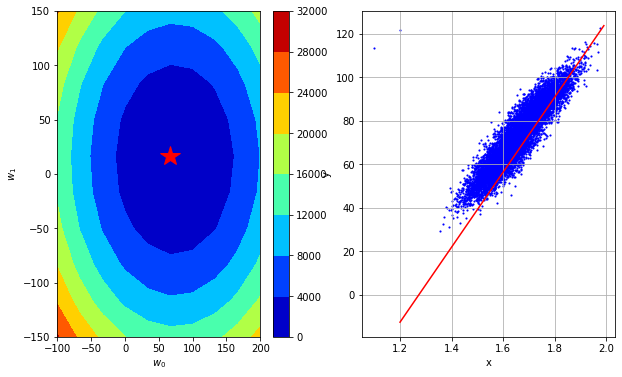

In [21]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [22]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    error = y - tx.dot(w.transpose())
    gradient = -1 * (1/ len(y)) * (tx.T @ error)
    return gradient
    # ***************************************************
    raise NotImplementedError

In [23]:
wt1 = np.array([100, 20])
wt2 = np.array([50, 10])
print(compute_gradient(y, tx, wt1))
print(compute_gradient(y, tx, wt2))

[26.69721433  6.60595817]
[-23.30278567  -3.39404183]


Please fill in the functions `gradient_descent` below:

In [24]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        w = w - (gamma * gradient)
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): gradient={g} loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, g=gradient, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [25]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): gradient=[-73.30278567 -13.39404183] loss=2793.0633249190396, w0=51.311949971831574, w1=9.375829281932592
Gradient Descent(1/49): gradient=[-21.9908357   -4.01821255] loss=266.58539632874687, w0=66.70553496338115, w1=12.18857806651237
Gradient Descent(2/49): gradient=[-6.59725071 -1.20546376] loss=39.20238275561818, w0=71.32361046084603, w1=13.032402701886323
Gradient Descent(3/49): gradient=[-1.97917521 -0.36163913] loss=18.737911534036595, w0=72.70903311008549, w1=13.285550092498509
Gradient Descent(4/49): gradient=[-0.59375256 -0.10849174] loss=16.896109124094252, w0=73.12465990485732, w1=13.361494309682165
Gradient Descent(5/49): gradient=[-0.17812577 -0.03254752] loss=16.73034690719944, w0=73.24934794328887, w1=13.384277574837261
Gradient Descent(6/49): gradient=[-0.05343773 -0.00976426] loss=16.715428307678906, w0=73.28675435481834, w1=13.39111255438379
Gradient Descent(7/49): gradient=[-0.01603132 -0.00292928] loss=16.714085633722057, w0=73.29797627827718

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [27]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    error = y - tx.dot(w.transpose())
    gradient = -1 * (1/ len(y)) * (tx.T @ error)
    return gradient
    # ***************************************************
    raise NotImplementedError

from helpers import batch_iter
    
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    losses = []
    ws = []
    w = initial_w
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            gradient = compute_stoch_gradient(y_batch, tx_batch, w)
            w = w - gamma * gradient
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    # ***************************************************
    return losses, ws

In [28]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=696.6649907471054, w0=53.21037678247538, w1=-17.528396312264817
SGD(1/49): loss=507.8393190032286, w0=67.32188658156304, w1=-17.370866398149193
SGD(2/49): loss=235.42796135476814, w0=86.22721657669278, w1=-3.049409840036498
SGD(3/49): loss=465.045178212266, w0=59.160661047080964, w1=39.7884117191769
SGD(4/49): loss=116.66384148476558, w0=83.35142900934409, w1=23.340123693347167
SGD(5/49): loss=21.16909126608901, w0=71.97930796410627, w1=10.718470191497529
SGD(6/49): loss=40.43144373687926, w0=74.78177624440256, w1=6.66741052859479
SGD(7/49): loss=29.987979024086684, w0=72.05441097335625, w1=8.395080642118238
SGD(8/49): loss=51.38307632042395, w0=64.99388021082133, w1=13.942071903929596
SGD(9/49): loss=75.09120510879187, w0=69.97798924627558, w1=3.112979957776183
SGD(10/49): loss=351.3520213694605, w0=86.36105367556159, w1=35.72692731117819
SGD(11/49): loss=342.1213602020303, w0=98.33696371038356, w1=18.303700145858187
SGD(12/49): loss=108.73972298194172, w0=83.078004420

In [29]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)